# 20.6.3 **Capstone Project Step 5: Data Wrangling and Exploration**
---
**Bruce Walker, UCSD MLE/AI Bootcamp**

In this notebook, I load the files from my chosen dataset and deal with missing data and malfformed data.

Dataset source: https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis/data?select=CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv



## Section 1 - Loading Data

In [1]:
!pip install seaborn --upgrade
!pip install datetime --upgrade

In [2]:
import os
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [3]:
def ts_to_datetime(time_in_secs):    
    return dt.datetime.fromtimestamp(float(time_in_secs))

In [4]:
"""
    Function for loading data files and parsing date data
"""
def load_net_traffic_file(fileitem):
    print('\tReading file contents...')
    df = pd.read_csv(fileitem.path,sep="|",low_memory=False)
    df["filename"] = fileitem.name
    df["date_time"] = df["ts"].apply(ts_to_datetime)
    
    return df


In [5]:
datapath="G:\\My Drive\\UCSD_MLE_Bootcamp_Capstone\\data\\MalwareDetectionInNetworkTrafficData"
if not(os.path.exists(datapath)):
    datapath="/Users/bdwalker1/Library/CloudStorage/GoogleDrive-maritz.bruce@gmail.com/My Drive/UCSD_MLE_Bootcamp_Capstone/data/MalwareDetectionInNetworkTrafficData"
    if not(os.path.exists(datapath)):
        print("Data path does not exist!")
        
if (os.path.exists(datapath)):
    traffic_df = pd.DataFrame([])
    file_idx=0
    totrecs=0
    for fileitem in os.scandir(datapath + "/raw"):
        if fileitem.is_file():
            file_idx += 1
            filepath = fileitem.path
            filename = fileitem.name
            print(f'File {file_idx: >2}: {filename}')
            df = load_net_traffic_file(fileitem)
            reccount = df.shape[0]
            totrecs += reccount
            print(f'   Records from file: {reccount: >10}')
            traffic_df = pd.concat([traffic_df,df])
            del df
        # break
    
    print(f'\nTotal Records: {totrecs}')


File  1: CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv
	Reading file contents...
   Records from file:    1008748
File  2: CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv
	Reading file contents...
   Records from file:       3209
File  3: CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv
	Reading file contents...
   Records from file:       3286
File  4: CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv
	Reading file contents...
   Records from file:     156103
File  5: CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv
	Reading file contents...
   Records from file:      23145
File  6: CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv
	Reading file contents...
   Records from file:   10447787
File  7: CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv
	Reading file contents...
   Records from file:       4426
File  8: CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv
	Reading file contents...
   Records from file:    3394338
File  9: CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv
	Reading

In [6]:
# Reindex after combining all files
traffic_df.reset_index(drop=True,inplace=True)


In [7]:
# Take a peek
traffic_df.head(50)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label,filename,date_time
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:31.015811
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:31.025055
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:31.045045
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:32.016240
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:32.024985
5,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:32.044975
6,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,-,2.998804,0,...,S,3.0,180.0,0.0,0.0,-,Benign,-,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:33.016171
7,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Benign,-,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:33.044906
8,1.525880e+09,CDtZ4so7bHKpIeCmi,192.168.100.103,58525.0,177.75.151.125,23.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:34.024847
9,1.525880e+09,Cj9lm7amKnWiNDh9c,192.168.100.103,43849.0,94.145.70.119,8080.0,tcp,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv,2018-05-09 08:30:34.045086


## Section 2 - Deal with missing and malformed data

In [8]:
# Check for null values
traffic_df.isna().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service                 0
duration                0
orig_bytes              0
resp_bytes              0
conn_state              0
local_orig              0
local_resp              0
missed_bytes            0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents          0
label                   0
detailed-label    9173939
filename                0
date_time               0
dtype: int64

In [9]:
# Fill any missing detailed-label values with "-"
traffic_df.fillna({"detailed-label": "-"},inplace=True)


In [10]:
# Check datatypes
traffic_df.dtypes

ts                       float64
uid                       object
id.orig_h                 object
id.orig_p                float64
id.resp_h                 object
id.resp_p                float64
proto                     object
service                   object
duration                  object
orig_bytes                object
resp_bytes                object
conn_state                object
local_orig                object
local_resp                object
missed_bytes             float64
history                   object
orig_pkts                float64
orig_ip_bytes            float64
resp_pkts                float64
resp_ip_bytes            float64
tunnel_parents            object
label                     object
detailed-label            object
filename                  object
date_time         datetime64[ns]
dtype: object

In [11]:
# Convert columns that should be int
traffic_df["id.orig_p"] = traffic_df["id.orig_p"].astype("int")
traffic_df["id.resp_p"] = traffic_df["id.resp_p"].astype("int")
traffic_df["orig_pkts"] = traffic_df["orig_pkts"].astype("int")
traffic_df["resp_pkts"] = traffic_df["resp_pkts"].astype("int")
traffic_df["orig_ip_bytes"] = traffic_df["orig_ip_bytes"].astype("int")
traffic_df["resp_ip_bytes"] = traffic_df["resp_ip_bytes"].astype("int")
traffic_df["missed_bytes"] = traffic_df["missed_bytes"].astype("int")


In [12]:
# Convert columns that should be string
traffic_df["uid"] = traffic_df["uid"].astype("string")
traffic_df["id.orig_h"] = traffic_df["id.orig_h"].astype("string")
traffic_df["id.resp_h"] = traffic_df["id.resp_h"].astype("string")
traffic_df["proto"] = traffic_df["proto"].astype("string")
traffic_df["service"] = traffic_df["service"].astype("string")
traffic_df["conn_state"] = traffic_df["conn_state"].astype("string")
traffic_df["local_orig"] = traffic_df["local_orig"].astype("string")
traffic_df["local_resp"] = traffic_df["local_resp"].astype("string")
traffic_df["history"] = traffic_df["history"].astype("string")
traffic_df["tunnel_parents"] = traffic_df["tunnel_parents"].astype("string")
traffic_df["label"] = traffic_df["label"].astype("string")
traffic_df["detailed-label"] = traffic_df["detailed-label"].astype("string")
traffic_df["filename"] = traffic_df["filename"].astype("string")


In [13]:
# Check datatypes
traffic_df.dtypes

ts                       float64
uid               string[python]
id.orig_h         string[python]
id.orig_p                  int32
id.resp_h         string[python]
id.resp_p                  int32
proto             string[python]
service           string[python]
duration                  object
orig_bytes                object
resp_bytes                object
conn_state        string[python]
local_orig        string[python]
local_resp        string[python]
missed_bytes               int32
history           string[python]
orig_pkts                  int32
orig_ip_bytes              int32
resp_pkts                  int32
resp_ip_bytes              int32
tunnel_parents    string[python]
label             string[python]
detailed-label    string[python]
filename          string[python]
date_time         datetime64[ns]
dtype: object

In [14]:
# Examine label and detailed-label values
display(traffic_df[["label"]].value_counts())
display(traffic_df[["label","detailed-label"]].value_counts())


label                                
Benign                                   8777766
Malicious                                7046785
Malicious   DDoS                         5778153
Malicious   PartOfAHorizontalPortScan    3386241
Malicious   C&C                             8660
Malicious   Attack                          2755
Malicious   FileDownload                       3
Name: count, dtype: int64

label                                  detailed-label           
Benign                                 -                            8777766
Malicious                              PartOfAHorizontalPortScan    7040807
Malicious   DDoS                       -                            5778153
Malicious   PartOfAHorizontalPortScan  -                            3386241
Malicious   C&C                        -                               6787
Malicious                              Attack                          5962
Malicious   Attack                     -                               2755
Malicious   C&C                        HeartBeat                        940
                                       PartOfAHorizontalPortScan        888
                                       Torii                             30
Malicious                              C&C                               16
Malicious   C&C                        FileDownload                      15
Malicious   FileDownloa

In [15]:
# Some detailed-label information is in the label field. Move it.
traffic_df["tmp_det_label"] = traffic_df["label"].str.split().apply(lambda x: "-" if len(x) == 1 else ' '.join(x[1:]))
traffic_df["tmp_det_label"] = traffic_df["detailed-label"].where(traffic_df["tmp_det_label"] == "-", traffic_df["tmp_det_label"] + " " + traffic_df["detailed-label"])
traffic_df.loc[traffic_df["tmp_det_label"].str.endswith(" -"),["tmp_det_label"]] = traffic_df[traffic_df["tmp_det_label"].str.endswith(" -")]["tmp_det_label"].str.replace(" -","")
traffic_df["detailed-label"] = traffic_df["tmp_det_label"]
traffic_df.drop("tmp_det_label", axis=1, inplace=True)
traffic_df.loc[traffic_df["label"].str.split().apply(len) > 1, ["label"]] = traffic_df[traffic_df["label"].str.split().apply(len) > 1]["label"].apply(lambda x: str(x.split()[0]))


In [16]:
# Examine label and detailed-label values, again
display(traffic_df.groupby(["label"])["label"].count())
print("--------")
display(traffic_df.groupby(["label","detailed-label"])["label"].count())


label
Benign        8777766
Malicious    16222597
Name: label, dtype: int64

--------


label      detailed-label               
Benign     -                                 8777766
Malicious  Attack                               8717
           C&C                                  6803
           C&C FileDownload                       15
           C&C HeartBeat                         940
           C&C PartOfAHorizontalPortScan         888
           C&C Torii                              30
           DDoS                              5778153
           FileDownload                            3
           PartOfAHorizontalPortScan        10427048
Name: label, dtype: int64

In [17]:
# Check for null values, again
traffic_df.isna().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
filename          0
date_time         0
dtype: int64

In [21]:
# Save the cleaned data to new CSV files for use in model training and evaluation
output_filename_template = datapath + "/combined/CTU-IoT-Malware-Capture_.csv"

total_rows = traffic_df.shape[0]
file_index = 0
max_rows_per_file=5000000
start_index=0
while (start_index < total_rows):
    file_index += 1
    output_filename = output_filename_template.replace("_.",f"_{file_index:03}.")
    end_index = start_index + max_rows_per_file
    if (end_index > total_rows):
        end_index = total_rows
    traffic_df[start_index:end_index].to_csv(path_or_buf=output_filename, sep="|", header=True, index=False, mode="w")
    start_index += max_rows_per_file

In [22]:
traffic_df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', 'filename', 'date_time'],
      dtype='object')

In [23]:
#del traffic_df

## Section 3 - Data Exploration

In [25]:
# Copy data to a work-in-progress (wip) data frame so we can return here without reloading if needed
# Load from file, if needed
if (("wip_df" in locals()) or ("wip_df" in globals())):
    del wip_df

if (("traffic_df" in locals()) or ("traffic_df" in globals())):
    wip_df = traffic_df.copy()
else:
    output_filename = datapath + "\\CTU-IoT-Malware-Capture-combined.csv"
    dtypes_dict = {'ts': 'float64', 'uid': 'string', 'id.orig_h': 'string', 'id.orig_p': 'int32', \
                   'id.resp_h': 'string', 'id.resp_p': 'int32', 'proto': 'string', 'service': 'string', \
                   'duration': 'O', 'orig_bytes': 'O', 'resp_bytes': 'O', \
                   'conn_state': 'string', 'local_orig': 'string', 'local_resp': 'string', \
                   'missed_bytes': 'int32', 'history': 'string', \
                   'orig_pkts': 'int32', 'orig_ip_bytes': 'int32', 'resp_pkts': 'int32', 'resp_ip_bytes': 'int32', \
                   'tunnel_parents': 'string', 'label': 'string', 'detailed-label': 'string', \
                   'filename': 'string', 'date_time': 'string'}
    wip_df = pd.read_csv(output_filename, sep="|",low_memory=False, dtype=dtypes_dict, parse_dates=['date_time'])

In [26]:
print(f'Total records: {wip_df.shape[0]}')
print()
display(wip_df.dtypes)

Total records: 25000363



ts                       float64
uid               string[python]
id.orig_h         string[python]
id.orig_p                  int64
id.resp_h         string[python]
id.resp_p                  int64
proto             string[python]
service           string[python]
duration                  object
orig_bytes                object
resp_bytes                object
conn_state        string[python]
local_orig        string[python]
local_resp        string[python]
missed_bytes               int64
history           string[python]
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents    string[python]
label             string[python]
detailed-label    string[python]
filename          string[python]
date_time         datetime64[ns]
dtype: object

## Look for any columns that won't have predictive value

Columns that do not have predictive value can be removed before training model. Eliminating useless data should save computing time.


### Look for columns that are not distinct or too distinct

In [29]:
# Are there any columns that have only one value?
print('Columns with only one value:')
for col in wip_df:
     if (wip_df[col].unique().shape[0] == 1):
         print(f'\t{col}')


Columns with only one value:
	local_orig
	local_resp
	tunnel_parents


In [30]:
# Are there any columns where all values are unique?
print("Columns with all unique values:")
for col in wip_df:
     if (wip_df[col].unique().shape[0] == wip_df[col].shape[0]):
         print(f'\t{col}')


Columns with all unique values:
	ts
	uid
	date_time


### Look at columns with mixed data types

In [32]:
# Look at duration
wip_df["duration"].value_counts()


duration
-               15265807
2e-06            1166688
1e-06             273135
5e-06              95036
4e-06              43151
                  ...   
2.718702               1
2.540538               1
1.381718               1
4.729599               1
30007.122211           1
Name: count, Length: 1045901, dtype: int64

---

**With ~75% of the `duration` not being populated, I will not use `duration` in my model**

---

In [34]:
# Look at orig_bytes and resp_bytes
display(wip_df["orig_bytes"].value_counts())
display(wip_df["resp_bytes"].value_counts())

# Compare orig_bytes and resp_bytes that are populated to their _ip_bytes and _pkts couterparts
display(wip_df.loc[(wip_df["orig_bytes"] != "-")][["orig_bytes","orig_pkts"]].loc[(wip_df["orig_bytes"] != "0")].value_counts())
display(wip_df.loc[(wip_df["resp_bytes"] != "-")][["resp_bytes","resp_pkts"]].loc[(wip_df["resp_bytes"] != "0")].value_counts())


orig_bytes
-              15265807
0               9616783
48                10653
589                5841
318                4685
                 ...   
33888660340           1
29491230159           1
27774849856           1
30848402547           1
8499                  1
Name: count, Length: 66146, dtype: int64

resp_bytes
-       15265807
0        9700862
48         10628
45          2827
96          1622
          ...   
2210           1
897            1
744            1
131            1
8025           1
Name: count, Length: 872, dtype: int64

orig_bytes   orig_pkts
48           1            10610
318          3             4685
78           2             2122
96           2             1992
18           5             1827
                          ...  
29536667055  62               1
29537171115  61               1
29537437237  64               1
29537455093  58               1
992          480              1
Name: count, Length: 67628, dtype: int64

resp_bytes  resp_pkts
48          1            10628
45          1             2823
96          2             1608
243         6              734
144         5              725
                         ...  
225         15               1
2246        5                1
2241        26               1
224         38               1
994         4                1
Name: count, Length: 2292, dtype: int64

---

**About 75% of `orig_bytes` and `resp_bytes` values are not populated, and many more are populated with zero.
For the values that are populated, they generally track with their `_pkts` counterparts. 
So, I will drop `orig_bytes` and `resp_bytes` before training.**

---

In [36]:
wip_df["local_orig"].value_counts()

local_orig
-    25000363
Name: count, dtype: Int64

### Look for columns that may be redundant

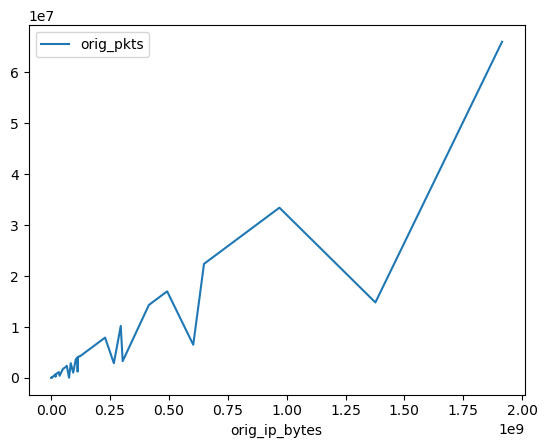

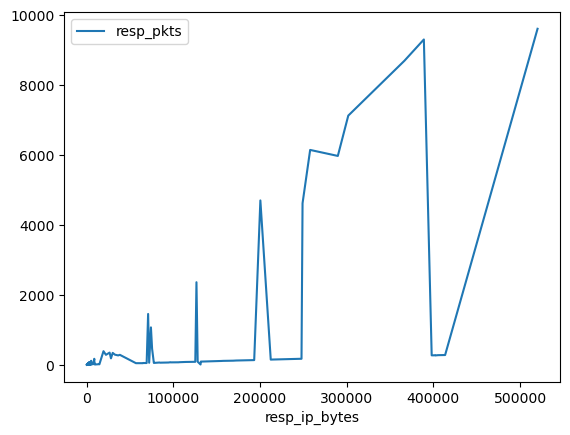

In [38]:
pkts_bytes_df = wip_df[["orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes"]]
pkts_bytes_df.sort_values("orig_ip_bytes")[["orig_pkts","orig_ip_bytes"]].plot("orig_ip_bytes")
pkts_bytes_df.sort_values("resp_ip_bytes")[["resp_pkts","resp_ip_bytes"]].plot("resp_ip_bytes")
del pkts_bytes_df

---

**I thought `orig_pkts` and `orig_ip_bytes` as well as the `resp_pkts` and `resp_ip_bytes` field pairs would have a very linear correlation, but the plots above would indicate that is not the case. So, I will keep all four fields in my training data.**

---

### Look at the values present in the remaining text fields


In [41]:
display(wip_df["proto"].value_counts())
print("\n")
display(wip_df["service"].value_counts())
print("\n")
display(wip_df["conn_state"].value_counts())
print("\n")
display(wip_df["history"].value_counts())


proto
tcp     24535142
udp       440105
icmp       25116
Name: count, dtype: Int64

service
-       24982377
dns         7033
ssh         5899
http        3385
irc         1647
dhcp          11
ssl           11
Name: count, dtype: Int64

conn_state
S0        19142796
OTH        3685333
RSTOS0     2119852
SF           30956
REJ          16072
S3            2458
RSTR          1917
RSTO           514
S2             136
S1             130
SH             120
RSTRH           78
SHR              1
Name: count, dtype: Int64

history
S              18720002
C               3592643
I               2119476
D                422774
DTT               65534
                 ...   
ShAdDfr               1
ShAdDatf              1
ShADCaGcgd            1
ShADaCGcgdF           1
DdAa                  1
Name: count, Length: 263, dtype: Int64

---

**It looks like `proto`, `service`, and `conn_state` are good candidates for encodinmg. `history` has over 200 values; it may make sense to lump the less common values into an "other" category before encoding and training. During model evaluation I will experiment with `history` to determine its value.**

---

In [43]:
del traffic_df, wip_df